# Gia Gillis

## Loan Interest Rate Analysis Part 2 of 3

Import necessary libraries.

In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime
%matplotlib inline

Load clean data and force Loan Id and Borrower Id into strings.

In [2]:
clean_loans=pd.read_csv(r'C:\Users\Gia\Downloads\Analyst_Test\Analyst_Test\clean_loan_interest_rates.csv', parse_dates=True, 
                        dtype={'Loan Id': str, 'Borrower Id':str})

In [3]:
clean_loans.head(10)

,Interest Rate,Requested,Funded,Investor Funded,Number of Payments,Loan Grade,Loan Subgrade,Job,Years Employed,Home,...,Loan Cat,State,Ratio,Late Payments,Credit Line Date,Months Del,Months PR,Derog Recs,Credit Lines,Status
0,0.1189,25000.0,25000.0,19080.0,36 months,B,B4,NaN,< 1 year,RENT,...,debt_consolidation,CA,19.48,0.0,1994-02-01,0.0,0.0,0.0,42.0,f
1,0.1071,7000.0,7000.0,673.0,36 months,B,B5,Cnn,< 1 year,RENT,...,credit_card,NY,14.29,0.0,2000-10-01,0.0,0.0,0.0,7.0,f
2,0.1699,25000.0,25000.0,24725.0,36 months,D,D3,Web Programmer,1 year,RENT,...,debt_consolidation,NY,10.50,0.0,2000-06-01,41.0,0.0,0.0,17.0,f
3,0.1311,1200.0,1200.0,1200.0,36 months,C,C2,City Of Beaumont Texas,10+ years,OWN,...,debt_consolidation,TX,5.47,0.0,1985-01-01,64.0,0.0,0.0,31.0,f
4,0.1357,10800.0,10800.0,10692.0,36 months,C,C3,State Farm Insurance,6 years,RENT,...,debt_consolidation,CT,11.63,0.0,1996-12-01,58.0,0.0,0.0,40.0,f
5,0.1905,7200.0,7200.0,7200.0,36 months,D,D4,Arkwright,9 years,RENT,...,debt_consolidation,RI,2.05,0.0,1994-04-01,26.0,0.0,0.0,25.0,f
6,0.1008,7500.0,5025.0,557.0,36 months,B,B3,Qualcomm Inc,3 years,RENT,...,debt_consolidation,CA,8.10,0.0,2000-11-01,0.0,0.0,0.0,11.0,f
7,0.1426,3000.0,3000.0,2988.0,36 months,C,C5,NaN,3 years,MORTGAGE,...,credit_card,TX,14.97,1.0,1998-07-01,13.0,0.0,0.0,23.0,f
8,0.0788,4000.0,4000.0,3900.0,36 months,A,A5,NaN,< 1 year,MORTGAGE,...,credit_card,TX,16.98,0.0,1993-05-01,0.0,0.0,0.0,19.0,f
9,0.1496,5600.0,5600.0,5525.0,36 months,D,D2,Pension Benefit Guaranty Corporation,1 year,RENT,...,debt_consolidation,MD,4.00,0.0,2001-06-01,38.0,63.0,1.0,9.0,f


In [4]:
clean_loans.dtypes

Interest Rate         float64
Requested             float64
Funded                float64
Investor Funded       float64
Number of Payments     object
Loan Grade             object
Loan Subgrade          object
Job                    object
Years Employed         object
Home                   object
Annual Income         float64
Income Verified        object
Loan Date              object
Loan Cat               object
State                  object
Ratio                 float64
Late Payments         float64
Credit Line Date       object
Months Del            float64
Months PR             float64
Derog Recs            float64
Credit Lines          float64
Status                 object
dtype: object

In [5]:
clean_loans['Loan Date'].head()

0    2009-08-01
1    2008-05-01
2    2014-08-01
3    2010-03-01
4    2009-11-01
Name: Loan Date, dtype: object

Convert date strings to date objects.

In [6]:
clean_loans['Loan Date']=pd.to_datetime(clean_loans['Loan Date'], format='%Y-%m-%d')
clean_loans['Credit Line Date']=pd.to_datetime(clean_loans['Credit Line Date'], format='%Y-%m-%d')

In [7]:
clean_loans['Loan Date'].head()

0   2009-08-01
1   2008-05-01
2   2014-08-01
3   2010-03-01
4   2009-11-01
Name: Loan Date, dtype: datetime64[ns]

In [8]:
clean_loans['Credit Line Date'].head()

0   1994-02-01
1   2000-10-01
2   2000-06-01
3   1985-01-01
4   1996-12-01
Name: Credit Line Date, dtype: datetime64[ns]

Find correlation of numeric data.

In [9]:
clean_loans.corr()

,Interest Rate,Requested,Funded,Investor Funded,Annual Income,Ratio,Late Payments,Months Del,Months PR,Derog Recs,Credit Lines
Interest Rate,1.000000,0.177601,0.178596,0.180885,-0.032222,0.158070,0.091639,0.078744,0.066411,0.073567,-0.027186
Requested,0.177601,1.000000,0.998340,0.994440,0.357750,0.061068,0.008767,-0.025896,-0.097935,-0.077652,0.237183
Funded,0.178596,0.998340,1.000000,0.996433,0.357098,0.062591,0.009389,-0.025241,-0.097459,-0.077071,0.237046
Investor Funded,0.180885,0.994440,0.996433,1.000000,0.355214,0.066440,0.010247,-0.024369,-0.095971,-0.075497,0.237443
Annual Income,-0.032222,0.357750,0.357098,0.355214,1.000000,-0.182042,0.060722,0.019552,-0.050258,-0.014919,0.222398
Ratio,0.158070,0.061068,0.062591,0.066440,-0.182042,1.000000,-0.002776,-0.010469,-0.037992,-0.045688,0.228682
Late Payments,0.091639,0.008767,0.009389,0.010247,0.060722,-0.002776,1.000000,-0.054831,-0.025360,-0.008409,0.133394
Months Del,0.078744,-0.025896,-0.025241,-0.024369,0.019552,-0.010469,-0.054831,1.000000,0.028485,0.060743,0.117379
Months PR,0.066411,-0.097935,-0.097459,-0.095971,-0.050258,-0.037992,-0.025360,0.028485,1.000000,0.681701,-0.028125
Derog Recs,0.073567,-0.077652,-0.077071,-0.075497,-0.014919,-0.045688,-0.008409,0.060743,0.681701,1.000000,0.004979


Correlation among the numerical data does not seem to show anything interesting.  Requested, Funded and Investor Funded are highly correlated, but that seems obvious.  Late Payments and Months Delinquent is correlated, but not significantly or surprising.

In [10]:
clean_loans.describe()

,Interest Rate,Requested,Funded,Investor Funded,Annual Income,Ratio,Late Payments,Months Del,Months PR,Derog Recs,Credit Lines
count,338852.000000,338851.000000,338851.000000,338851.000000,2.871180e+05,338851.000000,338851.000000,338852.000000,338852.000000,338851.000000,338851.000000
mean,0.139465,14277.955503,14249.406745,14183.735356,7.315437e+04,16.998183,0.274289,15.546103,9.754191,0.152743,24.979513
std,0.043782,8252.611517,8238.370007,8255.119910,5.619635e+04,7.696951,0.779329,22.515423,27.623107,0.505451,11.471803
min,0.054200,500.000000,500.000000,0.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.109900,8000.000000,8000.000000,8000.000000,4.500000e+04,11.250000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.136800,12000.000000,12000.000000,12000.000000,6.300000e+04,16.700000,0.000000,0.000000,0.000000,0.000000,23.000000
75%,0.167800,20000.000000,20000.000000,19900.000000,8.810975e+04,22.500000,0.000000,28.000000,0.000000,0.000000,32.000000
max,0.260600,35000.000000,35000.000000,35000.000000,7.500000e+06,39.990000,29.000000,188.000000,129.000000,63.000000,118.000000


In [11]:
clean_loans.describe(include=['object'])

,Number of Payments,Loan Grade,Loan Subgrade,Job,Years Employed,Home,Income Verified,Loan Cat,State,Status
count,338851,287001,287001,318601,324059,286892,338851,338851,338851,338851
unique,2,7,35,146909,11,3,3,14,50,2
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,verified - income,debt_consolidation,CA,f
freq,247661,86080,20342,4421,108455,145958,126990,198177,52812,232474


In [12]:
clean_loans['Loan Grade'].value_counts()

B    86080
C    76420
D    46965
A    45501
E    21621
F     8391
G     2023
Name: Loan Grade, dtype: int64

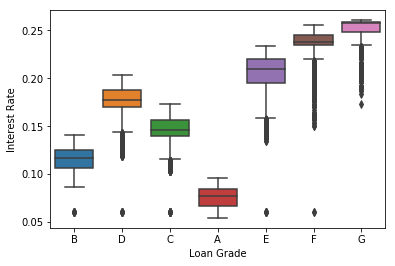

In [13]:
sns.boxplot(x='Loan Grade', y='Interest Rate', data=clean_loans)

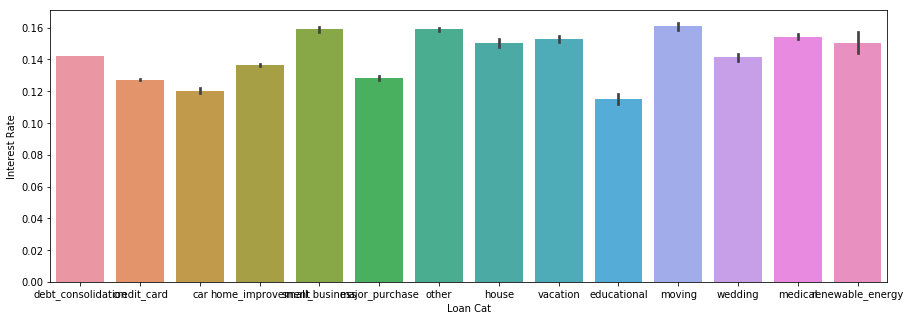

In [14]:
fig, ax = pyplot.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x='Loan Cat', y='Interest Rate', data=clean_loans)

In [15]:
clean_loans['Home'].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
Name: Home, dtype: int64

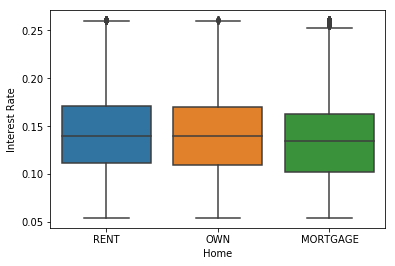

In [16]:
sns.boxplot(x='Home', y='Interest Rate', data=clean_loans)

Income Verified vs Interest Rate

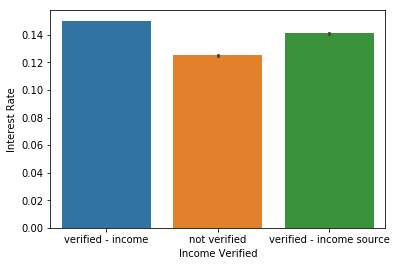

In [17]:
sns.barplot(x='Income Verified', y='Interest Rate', data=clean_loans)

In [18]:
top_jobs=clean_loans['Job'].value_counts().head(10)

In [19]:
print(top_jobs)

Teacher             4421
Manager             3908
Registered Nurse    2170
Supervisor          1897
Rn                  1623
Sales               1586
Driver              1514
Owner               1391
Project Manager     1261
Office Manager      1203
Name: Job, dtype: int64


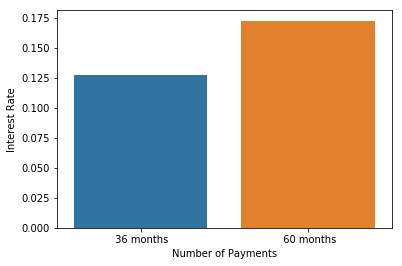

In [20]:
subset=clean_loans[['Number of Payments', 'Interest Rate']].dropna()
sns.barplot(x='Number of Payments', y='Interest Rate', data=subset)

C:\Users\Gia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


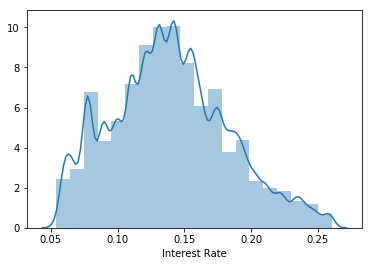

In [21]:
sns.distplot(clean_loans['Interest Rate'], bins=20)

C:\Users\Gia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


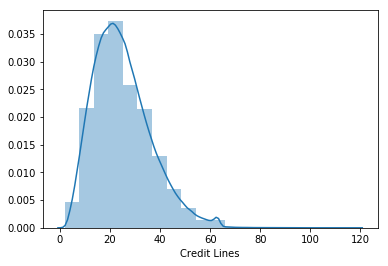

In [22]:
sns.distplot(clean_loans['Credit Lines'].dropna(), bins=20)

C:\Users\Gia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


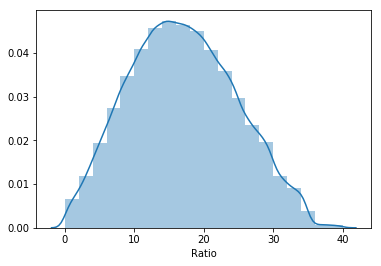

In [23]:
sns.distplot(clean_loans['Ratio'].dropna(), bins=20)

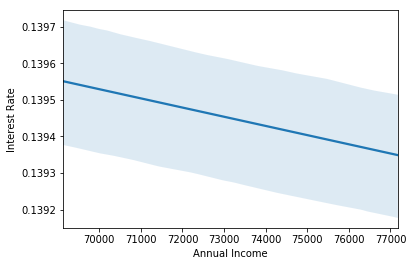

In [24]:
sns.regplot(x='Annual Income', y='Interest Rate', data=clean_loans, scatter=False)

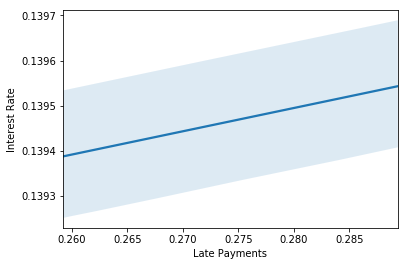

In [25]:
sns.regplot(x='Late Payments', y='Interest Rate', data=clean_loans, scatter=False)

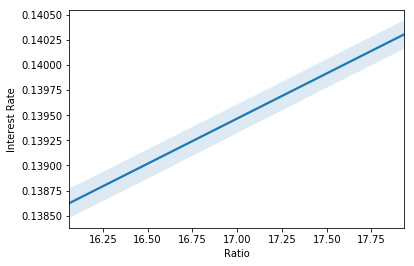

In [26]:
sns.regplot(x='Ratio', y='Interest Rate', data=clean_loans, scatter=False)

In [27]:
ir_group = clean_loans[['Number of Payments', 'Home', 'Loan Cat', 'Interest Rate']]
ir_group.groupby(['Number of Payments', 'Home', 'Loan Cat'], as_index=False).mean()

,Number of Payments,Home,Loan Cat,Interest Rate
0,36 months,MORTGAGE,car,0.103506
1,36 months,MORTGAGE,credit_card,0.111586
2,36 months,MORTGAGE,debt_consolidation,0.123199
3,36 months,MORTGAGE,educational,0.110494
4,36 months,MORTGAGE,home_improvement,0.120714
5,36 months,MORTGAGE,house,0.119475
6,36 months,MORTGAGE,major_purchase,0.109559
7,36 months,MORTGAGE,medical,0.142819
8,36 months,MORTGAGE,moving,0.148022
9,36 months,MORTGAGE,other,0.145592
